# Intro data science - portfolio assignment 17: Train a decision tree on the penguins dataset

30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.

- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [18]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

In [19]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Filling the blanks

First, we will fill the missing values of each column with the mean of that column.

In [20]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())

In [21]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


For sex, we will look at the most popular value and use that value to fill the missing values.

In [22]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

Looks about equal, so I will just fill the missing values with Male.

In [23]:
penguins['sex'] = penguins['sex'].fillna(value='Male')

In [24]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## Correlations

Before we do anything, it would be interesting to check the correlations between the columns. This way we can find out which feature would be good to use in our predictions.

In [25]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


The flipper length seems to be strongly correlated to the body mass. Let's use this as our feature.

## Splitting the dataset

We will split the dataset 70/30 so we have a train dataset and a test dataset.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3,
                                                stratify=penguins['species'],
                                                random_state=42)

print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


## Fitting the DecisionTreeRegressor

We will be predicting the penguin's body mass based on the flipper length. In the Pearson's correlation table we saw that these two variables have a strong correlation.

In [50]:
from sklearn.tree import DecisionTreeRegressor

features = ['flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth=3) # increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [51]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception('The amount of predictions did not equal the amount of actuals.')
        
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [52]:
predictionsOnTrainSet = dt_regression.predict(penguins_train[features])
predictionsOnTestSet = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainSet, penguins_train['body_mass_g'])
rmseTest = calculate_rmse(predictionsOnTestSet, penguins_test['body_mass_g'])

print('RMSE on training set ' + str(rmseTrain))
print('RMSE on test set ' + str(rmseTest))

RMSE on training set 385.7037576357823
RMSE on test set 340.3536605027887


In [53]:
from sklearn import tree

def plot_tree_regression(model, features):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(1116.0, 1902.6000000000001, 'flipper_length_mm <= 206.5\nmse = 637280.729\nsamples = 240\nvalue = 4233.549'),
 Text(558.0, 1359.0, 'flipper_length_mm <= 193.5\nmse = 208756.29\nsamples = 148\nvalue = 3738.188'),
 Text(279.0, 815.4000000000001, 'flipper_length_mm <= 179.5\nmse = 163366.139\nsamples = 91\nvalue = 3572.527'),
 Text(139.5, 271.79999999999995, 'mse = 111336.806\nsamples = 6\nvalue = 3270.833'),
 Text(418.5, 271.79999999999995, 'mse = 160160.381\nsamples = 85\nvalue = 3593.824'),
 Text(837.0, 815.4000000000001, 'flipper_length_mm <= 202.5\nmse = 167461.418\nsamples = 57\nvalue = 4002.662'),
 Text(697.5, 271.79999999999995, 'mse = 162083.176\nsamples = 49\nvalue = 3951.056'),
 Text(976.5, 271.79999999999995, 'mse = 84179.688\nsamples = 8\nvalue = 4318.75'),
 Text(1674.0, 1359.0, 'flipper_length_mm <= 217.5\nmse = 296872.637\nsamples = 92\nvalue = 5030.435'),
 Text(1395.0, 815.4000000000001, 'flipper_length_mm <= 211.5\nmse = 204010.682\nsamples = 56\nvalue = 4752.679'),

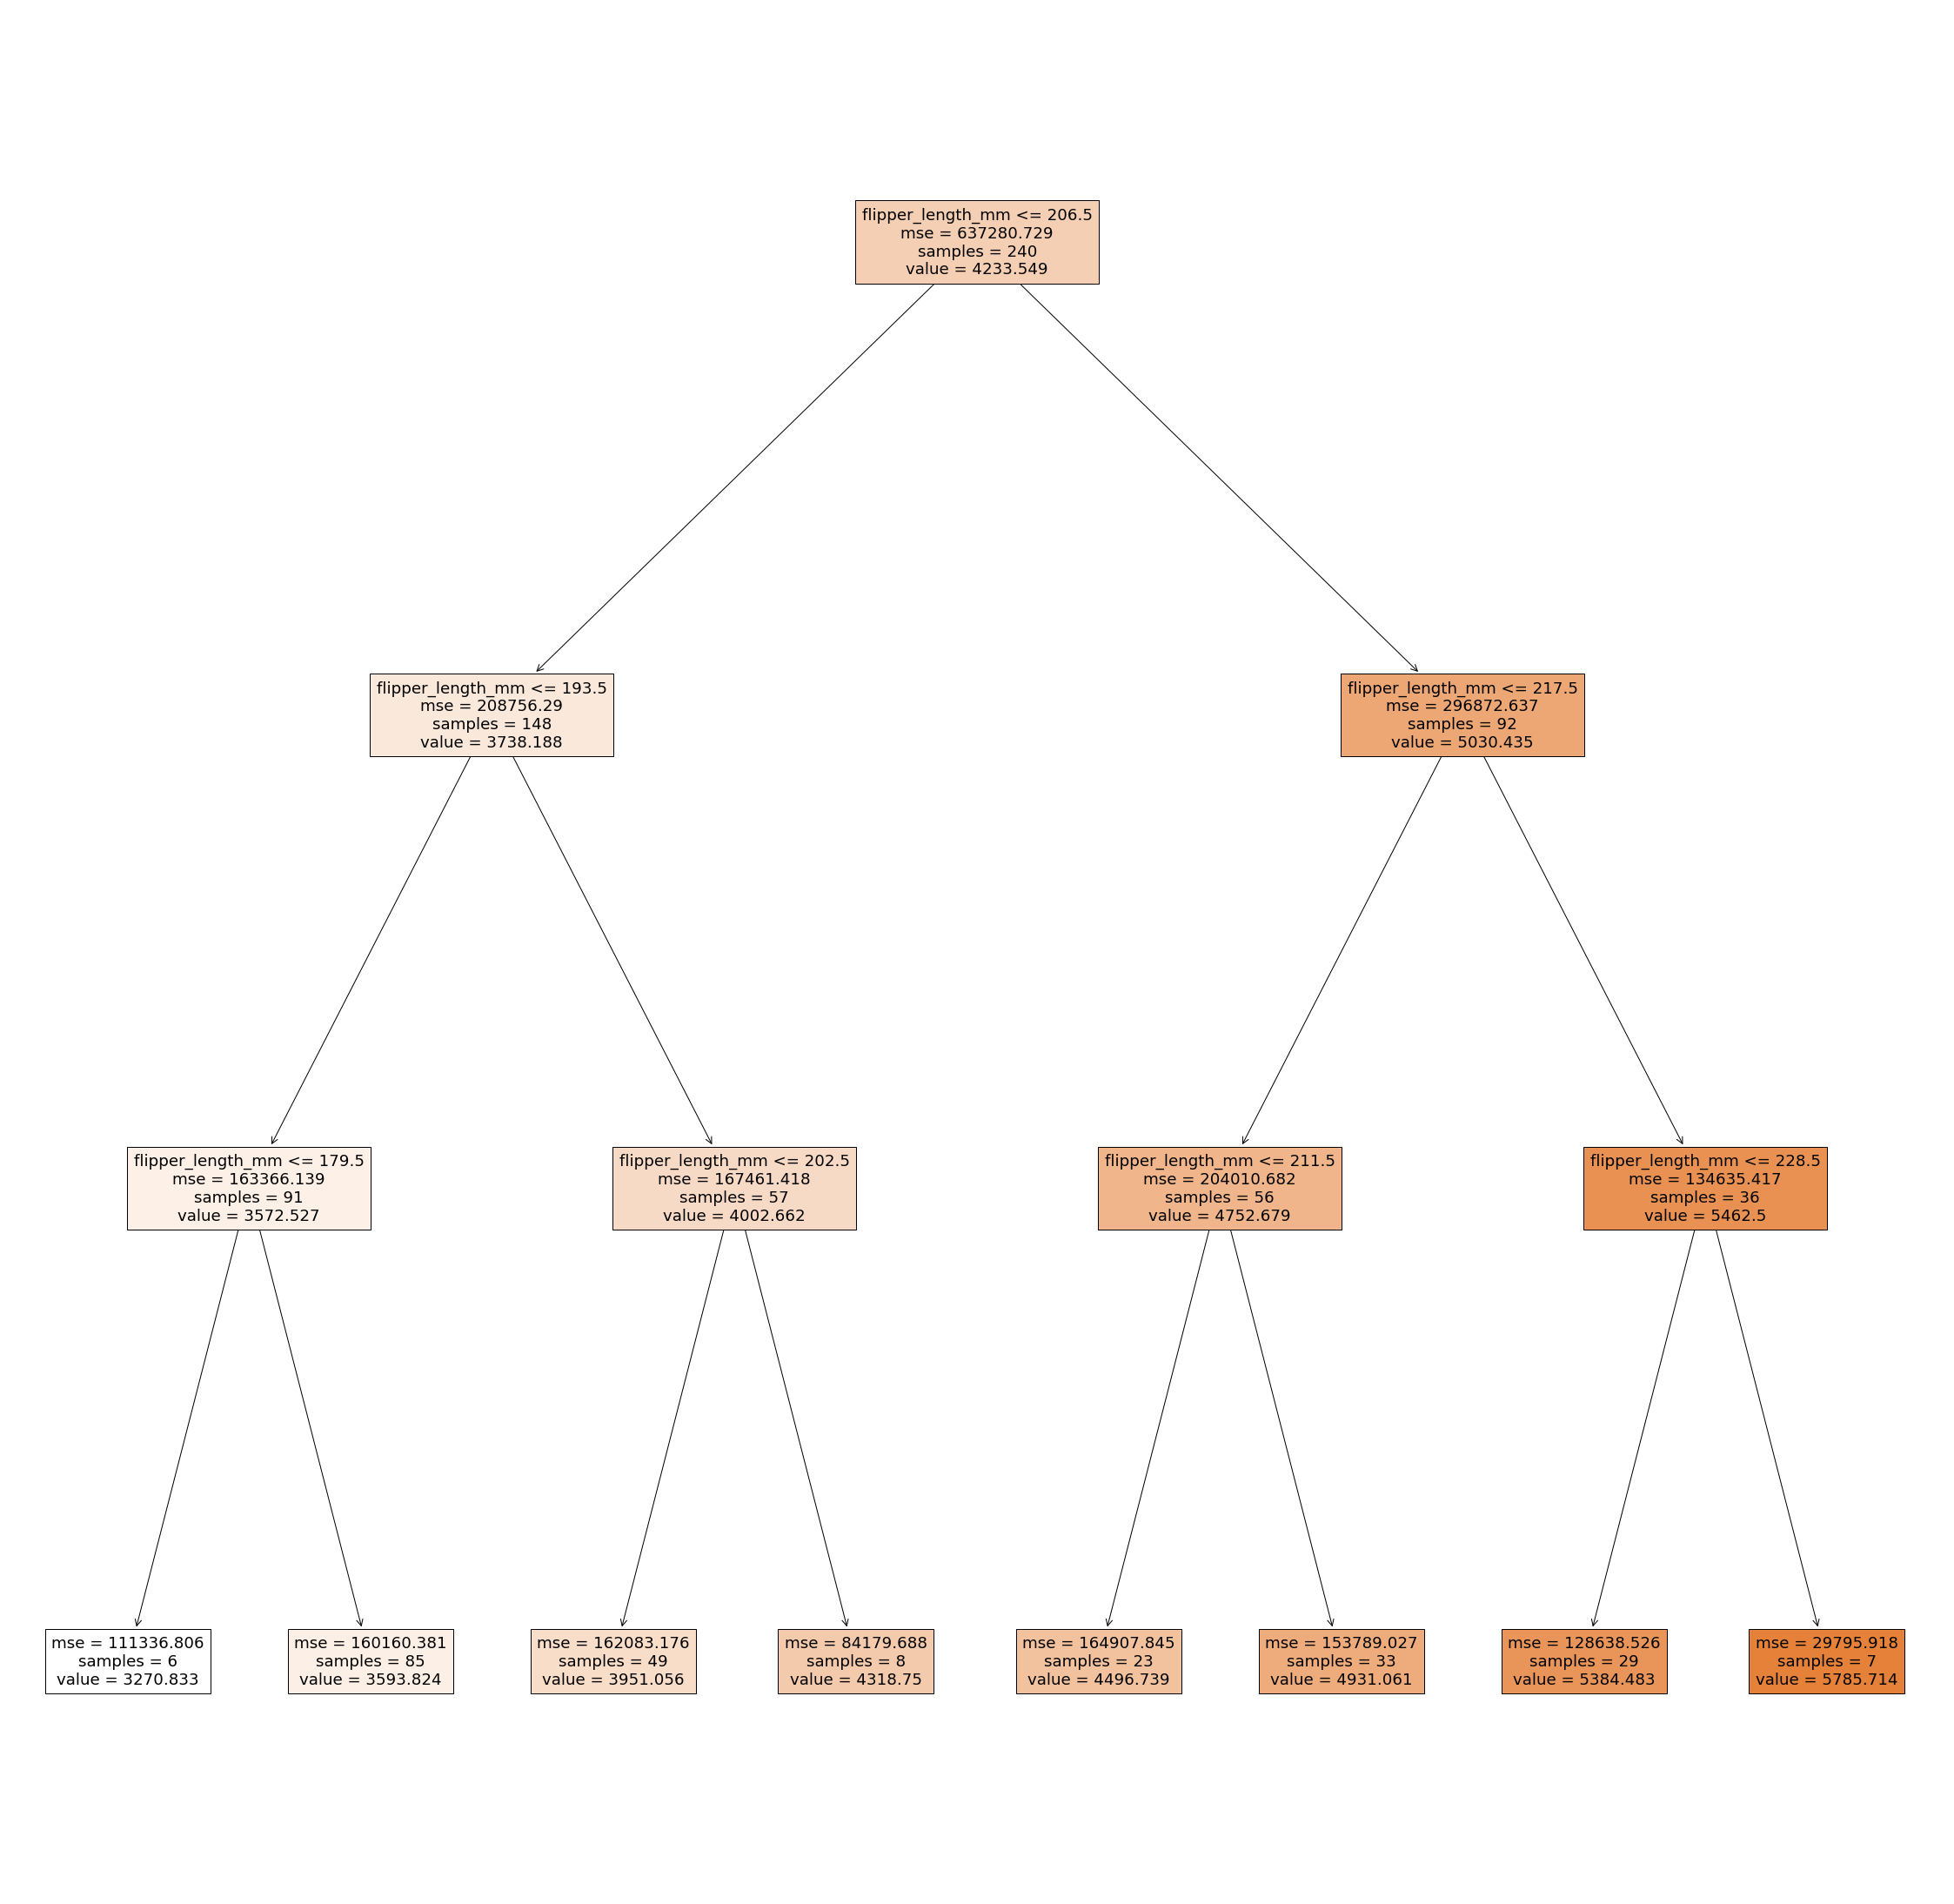

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

plot_tree_regression(dt_regression, features)